In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from itertools import combinations, groupby
from collections import Counter

**importing the data**

In [2]:
aisles = pd.read_csv("aisles.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
order_products__prior = pd.read_csv("order_products__prior.csv")
order_products__train = pd.read_csv("order_products__train.csv")
departments = pd.read_csv("departments.csv")

In [3]:
aisles.head(2)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


In [4]:
orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [5]:
products.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


In [36]:
order_products__prior.shape

(32434489, 4)

In [7]:
order_products__prior.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


In [37]:
order_products__train.shape

(1384617, 4)

In [9]:
order_products__train.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [10]:
departments.head(2)

,department_id,department
0,1,frozen
1,2,other


In [11]:
departments['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [12]:
aisles["aisle"].unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

# Data cleaning - Missing Value Treatment

In [13]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [14]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)

In [15]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

 **missing value treatment done**

# Merging prdoucts, aisles and department

In [16]:
products_merge = products.merge(aisles, how='left', on='aisle_id').merge(departments, how='left', on='department_id')

In [17]:
products_merge 

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


# Dataset for Content Filtering

In [18]:
df_content = products_merge[['product_id','product_name','aisle','department']]

In [19]:
df_content = df_content.merge(order_products__train[['add_to_cart_order','reordered','product_id','order_id']],on='product_id')

In [20]:
df_content = df_content.merge(orders[['user_id','order_id']],on='order_id')

In [21]:
df_content

,product_id,product_name,aisle,department,add_to_cart_order,reordered,order_id,user_id
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks,7,1,6695,1540
1,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,ice cream ice,frozen,14,1,6695,1540
2,3298,Mozzarella String Cheese,packaged cheese,dairy eggs,13,1,6695,1540
3,6184,Clementines,packaged produce,produce,19,1,6695,1540
4,9007,Frosted Flakes,cereal,breakfast,9,1,6695,1540
...,...,...,...,...,...,...,...,...
1384612,49683,Cucumber Kirby,fresh vegetables,produce,1,1,1132592,132799
1384613,49683,Cucumber Kirby,fresh vegetables,produce,1,1,2873216,78466
1384614,49683,Cucumber Kirby,fresh vegetables,produce,1,0,2910889,156859
1384615,49683,Cucumber Kirby,fresh vegetables,produce,1,1,3015609,126424


# Merging order_products__train with orders

In [22]:
merge_orders = order_products__train.merge(orders, how='inner', on='order_id')

In [23]:
merge_orders

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,169679,train,30,0,10,4.0
1384613,3421063,35548,4,1,169679,train,30,0,10,4.0
1384614,3421070,35951,1,1,139822,train,15,6,10,8.0
1384615,3421070,16953,2,1,139822,train,15,6,10,8.0


In [24]:
grouped_orders =  merge_orders.groupby("product_id")["reordered"].aggregate({'Total_reorders':'count'}).reset_index()

C:\Users\Robin G\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [25]:
grouped_orders = pd.merge(grouped_orders, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped_orders = grouped_orders.sort_values(by='Total_reorders', ascending=False)[:20]
grouped_orders

,product_id,Total_reorders,product_name
19574,24852,18726,Banana
10367,13176,15480,Bag of Organic Bananas
16685,21137,10894,Organic Strawberries
17300,21903,9784,Organic Baby Spinach
37499,47626,8135,Large Lemon
37609,47766,7409,Organic Avocado
37164,47209,7293,Organic Hass Avocado
13228,16797,6494,Strawberries
20648,26209,6033,Limes
22024,27966,5546,Organic Raspberries


# TOp 20 most ordered products

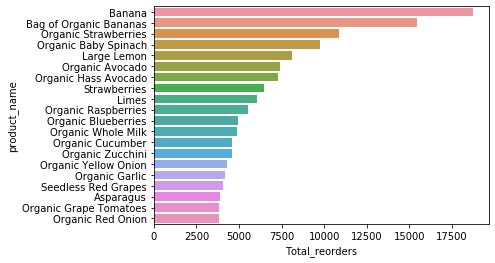

In [26]:
sns.barplot(x='Total_reorders',y='product_name',data=grouped_orders)
plt.show()

# Total no. of products per department

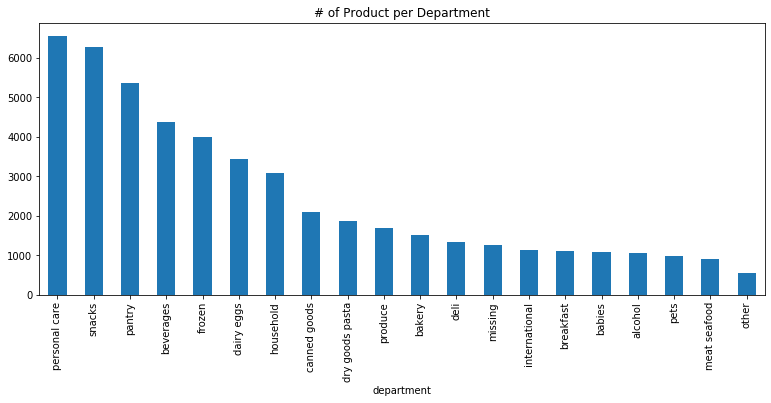

In [27]:
plt.figure(figsize=(13, 5))
products_merge.groupby(['department']).count()['product_id'].copy().sort_values(ascending=False)[:20].plot(kind='bar', title='# of Product per Department')

# Top 20 aisles

Text(0.5, 1.0, 'Top 20 Aisle in the Store')

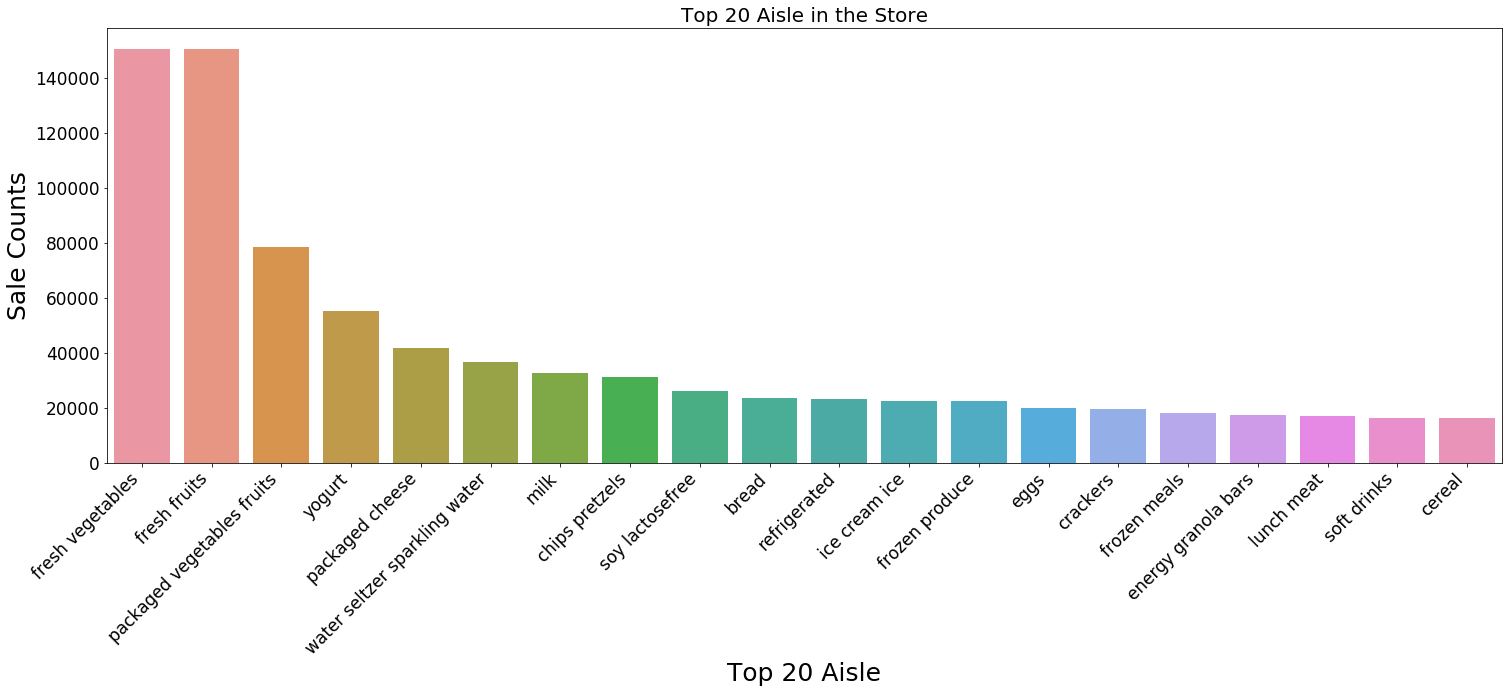

In [28]:
plt.figure(figsize=(25,8))
sns.barplot(df_content['aisle'].value_counts().index[:20],df_content['aisle'].value_counts()[:20])
plt.xlabel('Top 20 Aisle',fontsize=25)
plt.ylabel('Sale Counts',fontsize=25)
plt.xticks(fontsize=17,rotation=45,horizontalalignment='right')
plt.yticks(fontsize=17)
plt.title('Top 20 Aisle in the Store',fontsize=20)


# Total no. of products per aisle

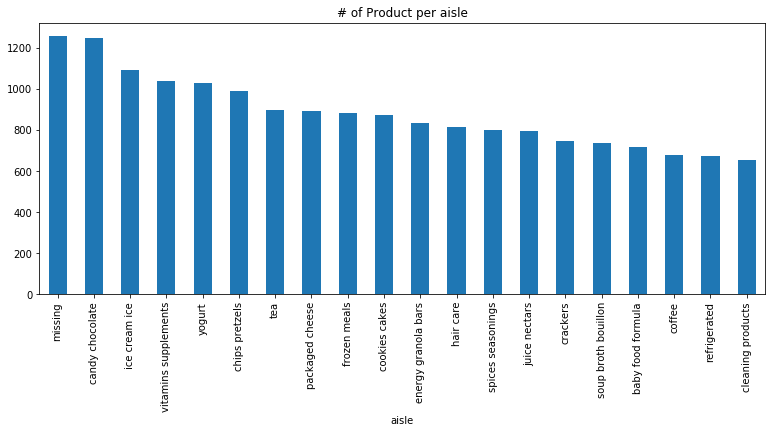

In [29]:
plt.figure(figsize=(13, 5))
products_merge.groupby(['aisle']).count()['product_id'].copy().sort_values(ascending=False)[:20].plot(kind='bar', title='# of Product per aisle')

# Top Selling Product Departments

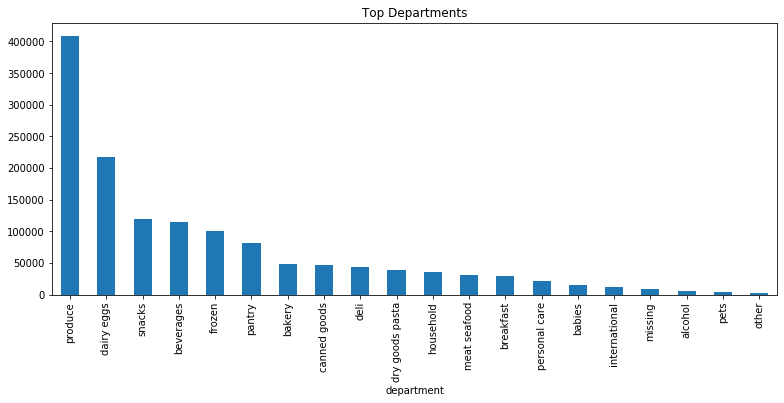

In [30]:
plt.figure(figsize=(13, 5))
df_content.groupby(['department']).count()['order_id'].copy().sort_values(ascending=False)[:20].plot(kind='bar', title='Top Departments')

# Top most reordered products

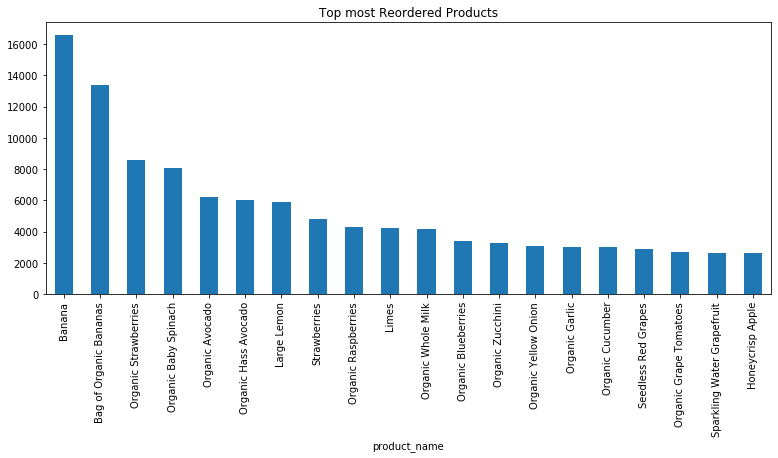

In [31]:
plt.figure(figsize=(13, 5))
df_content[df_content.reordered>0].groupby(['product_name']).count()['order_id'].copy().sort_values(ascending=False)[:20].plot(kind='bar', title='Top most Reordered Products')

# Top 20 users in the store

Text(0.5, 1.0, 'Top 20 Users in the store')

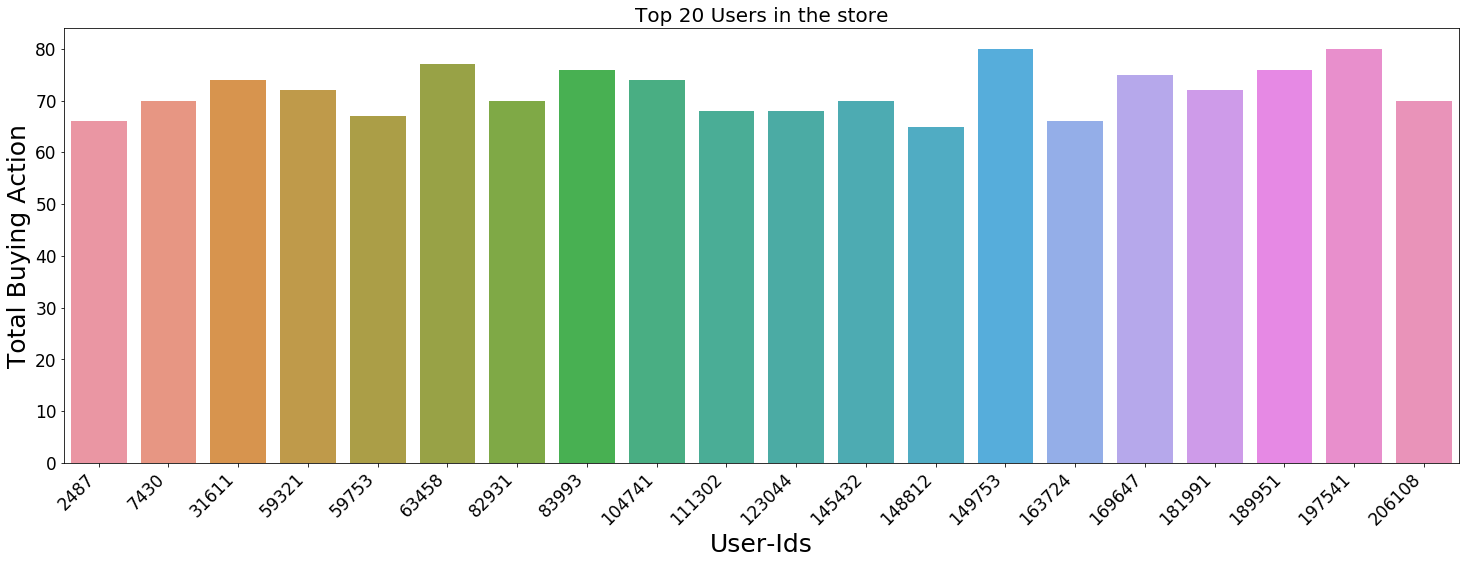

In [32]:
plt.figure(figsize=(25,8))

sns.barplot(df_content['user_id'].value_counts().index[:20],df_content['user_id'].value_counts()[:20])

plt.xlabel('User-Ids',fontsize=25)
plt.ylabel('Total Buying Action',fontsize=25)
plt.xticks(fontsize=17,rotation=45,horizontalalignment='right')
plt.yticks(fontsize=17)
plt.title('Top 20 Users in the store',fontsize=20)

# Reorderd product ratio

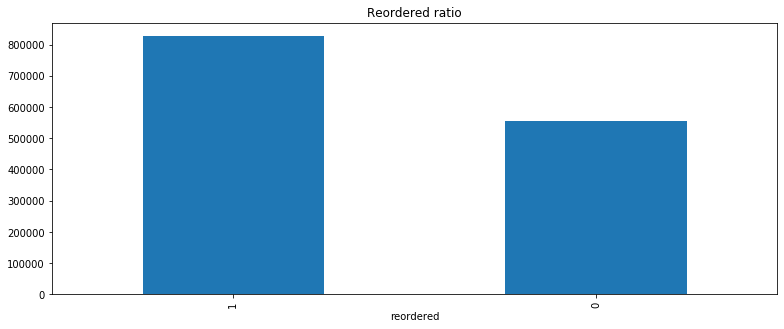

In [33]:
plt.figure(figsize=(13, 5))
df_content.groupby(['reordered']).count()['order_id'].copy().sort_values(ascending=False).plot(kind='bar', title='Reordered ratio')

# Merging both train and test data

In [39]:
order_products_all = pd.concat([order_products__prior, order_products__train], axis = 0)

In [40]:
order_products_all

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [41]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders = order_products_all.set_index('order_id')['product_id'].rename('item_id')
display(orders.head(10))
type(orders)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
3    33754
Name: item_id, dtype: int64

pandas.core.series.Series

In [44]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

In [45]:
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))

In [46]:
# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair

In [47]:
# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))

In [48]:
# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]


In [49]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [56]:
%%time
rules = association_rules(orders, 0.05)

Starting order_item:               33819106
Items with support >= 0.05:            3402
Remaining order_item:              25428820
Remaining orders with 2+ items:     2990617
Remaining order_item:              25164087


C:\Users\Robin G\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Item pairs:                         8160763
Item pairs with support >= 0.05:       4686

Wall time: 25min 44s


In [57]:
# Replace item ID with item name and display association rules
item_name   = pd.read_csv('products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)


,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Almond Milk Strawberry Yogurt,Almond Milk Blueberry Yogurt,1684,0.056309,5892,0.197016,4891,0.163545,0.285811,0.344306,1.747602
1,Yotoddler Organic Pear Spinach Mango Yogurt,Organic Whole Milk Strawberry Beet Berry Yogur...,1562,0.052230,6225,0.208151,6512,0.217748,0.250924,0.239865,1.152360
2,Strawberry on the Bottom Nonfat Greek Yogurt,Blueberry on the Bottom Nonfat Greek Yogurt,1668,0.055774,7894,0.263959,6584,0.220155,0.211300,0.253341,0.959776
3,Strawberry on the Bottom Nonfat Greek Yogurt,Peach on the Bottom Nonfat Greek Yogurt,1580,0.052832,7894,0.263959,8054,0.269309,0.200152,0.196176,0.743206
5,Total 0% Raspberry Yogurt,Fat Free Blueberry Yogurt,1788,0.059787,12562,0.420047,7398,0.247374,0.142334,0.241687,0.575381
...,...,...,...,...,...,...,...,...,...,...,...
267,Boneless Skinless Chicken Breasts,Bag of Organic Bananas,1638,0.054771,51885,1.734926,390168,13.046405,0.031570,0.004198,0.002420
87,Organic Lemon,Banana,3519,0.117668,90822,3.036898,486636,16.272094,0.038746,0.007231,0.002381
245,Yellow Onions,Bag of Organic Bananas,2287,0.076473,76689,2.564320,390168,13.046405,0.029822,0.005862,0.002286
112,Organic Navel Orange,Banana,1542,0.051561,44559,1.489960,486636,16.272094,0.034606,0.003169,0.002127


In [59]:
rules.to_csv('rules.csv')